In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Read data from CSV file into a DataFrame
df = pd.read_csv(r'E:\NUST-dairy\Module\Project\AI-Data.csv')

# Define the features and target variable
features = ['raisedhands', 'VisITedResources', 'AnnouncementsView']
target = 'Class'

# Convert the target variable to numerical using label encoding
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Split the data into training and test sets
X = df[features]
y = df[target]

# Normalize the features
X = (X - X.mean()) / X.std()

# Add bias term to X
X = np.c_[np.ones(X.shape[0]), X]

# Define the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Initialize the parameters with zeros
num_features = X.shape[1]
theta = np.zeros(num_features)
#print('values:', num_features)
# Perform gradient descent
for _ in range(num_iterations):
    # Calculate the predicted values
    y_pred = X.dot(theta)
    
    # Calculate the gradient
    gradient = (1 / len(X)) * X.T.dot(y_pred - y)
    
    # Update the parameters
    theta = theta - learning_rate * gradient

# Print the coefficients (parameters) of the model
print('Coefficients:', theta[1:])
print('Intercept:', theta[0])

values: 4
Coefficients: [-0.19089448 -0.00955558  0.00596197]
Intercept: 1.1437006228857738


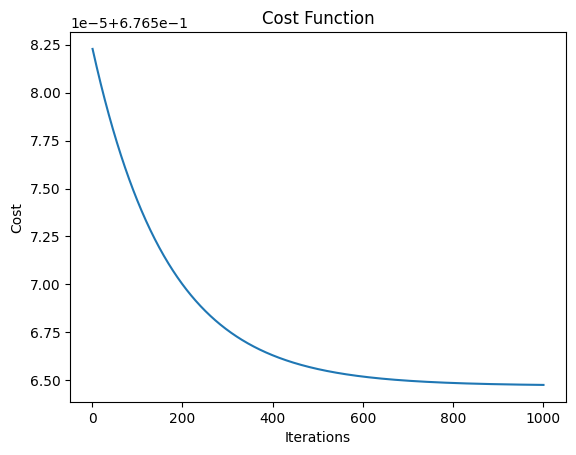

In [3]:
import matplotlib.pyplot as plt

# Initialize an empty list to store the cost values
cost_history = []

# Perform gradient descent
for _ in range(num_iterations):
    # Calculate the predicted values
    y_pred = X.dot(theta)
    
    # Calculate the gradient
    gradient = (1 / len(X)) * X.T.dot(y_pred - y)
    
    # Update the parameters
    theta = theta - learning_rate * gradient
    
    # Calculate the cost (mean squared error)
    cost = np.mean((y_pred - y) ** 2)
    cost_history.append(cost)

# Plot the cost history
plt.plot(range(1, num_iterations + 1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

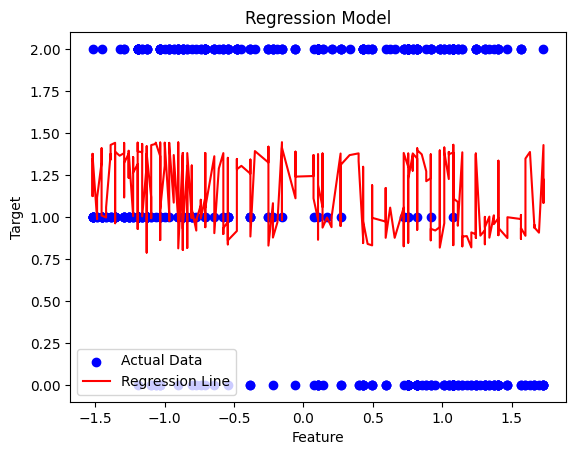

In [4]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X[:, 1], y, color='blue', label='Actual Data')

# Sort the feature values in ascending order for a smooth line plot
X_sorted = np.sort(X[:, 1])

# Predict the corresponding target values using the trained model
y_pred = X.dot(theta)

# Plot the regression line
plt.plot(X_sorted, y_pred, color='red', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Regression Model')

# Add legend
plt.legend()

# Show the plot
plt.show()